## Importing Libraries

In [36]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Importing the dataset

In [38]:
data=pd.read_csv('data.csv')



In [40]:
print(data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [41]:
data.info #gives no of rows and column

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

## Data Preprocessing

In [22]:
 #Replacing the Null values with the means of the columns.
newdata=data
No_zero=['Glucose','BloodPressure','SkinThickness','Insulin']
for col in No_zero:
    newdata[col]=newdata[col].replace(0,np.NaN)
    mean=int(newdata[col].mean(skipna=True))
    newdata[col]=newdata[col].replace(np.NaN,mean)
newdata    # So the columns conatining the missing or Null values are replaced by the mean of the specific column.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,155.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,155.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,155.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,155.0,30.1,0.349,47,1


In [23]:
X=data.iloc[:,0:8].values  #independent variables
y=data.iloc[:,8].values     # dependent variables

## Spliting the Dataset Into Training set & Test set

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## Feature Scaling

In [25]:
#minimizing the large values using Feature scaling
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)


In [26]:
print(x_train)

[[-1.13311543  0.93797487  1.42887509 ...  1.22646853 -0.3002719
  -1.05654479]
 [-0.8391623  -1.29569477 -0.42228516 ... -1.75097771  0.45699051
  -0.55622332]
 [-0.54520916 -0.01461954 -0.25399786 ...  0.56619802 -0.39305899
  -0.55622332]
 ...
 [ 0.0426971  -0.93436586 -0.6747161  ... -0.941212   -0.96774035
  -1.05654479]
 [ 2.10036903 -1.22999861  0.08257673 ... -0.26848356 -0.51278428
   0.11087198]
 [ 0.33665024  0.44525362  0.75572591 ... -4.01832171  0.50488062
   2.94602702]]


In [27]:
print(x_test)

[[-0.85904815  2.61205799  0.40895682 ...  1.53810427  2.84152033
  -0.92178738]
 [-0.55469213 -0.4263359   0.24802151 ...  0.29616283 -0.21344264
  -0.83179039]
 [ 0.0540199  -1.45014254 -0.71759033 ...  0.34957966 -0.25355832
  -0.6517964 ]
 ...
 [-0.85904815 -0.82264815 -0.87852564 ... -0.99919545 -0.6578009
  -0.92178738]
 [-0.85904815 -0.45936192  0.40895682 ...  0.81697698 -0.85220763
  -0.56179941]
 [ 1.88015599  0.06905441  0.56989213 ... -0.50508972  0.11982604
   1.14814346]]


## Using K-NN Classifier

In [28]:
# Using the KNN Algorithm
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [29]:
y_pred=classifier.predict(x_test)


In [30]:
#creating a matrix for correct data and incorrect data
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



[[137  20]
 [ 28  46]]
0.6571428571428571
0.7922077922077922


## Using Matplotlib

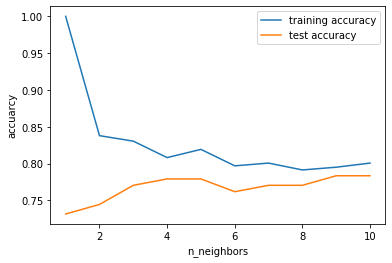

In [35]:
#Plotting the prediction in the graphicall format
training_accuracy=[]
test_accuracy=[]
neighbors_setting=range(1,11)

for n_neighbors in neighbors_setting:
    #buildng the model
    knn=KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(x_train,y_train)
    #record training set accuracy
    training_accuracy.append(knn.score(x_train,y_train))
    knn.fit(x_train,y_train)
    #record testing set accuracy
    test_accuracy.append(knn.score(x_test,y_test))
plt.plot(neighbors_setting,training_accuracy,label="training accuracy")
plt.plot(neighbors_setting,test_accuracy,label="test accuracy")
plt.ylabel("accuarcy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [32]:
#Checking the accuraccy using different k values
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
print('Accuracy of K-NN classifier on training set :{:.2f}'.format(knn.score(x_train,y_train)))
print('Accuracy of K-NN classifier on test set :{:.2f}'.format(knn.score(x_test,y_test)))


Accuracy of K-NN classifier on training set :0.80
Accuracy of K-NN classifier on test set :0.78


## Prediction for a new Patient

In [42]:
#[o] = Person does'nt have Diabetes
#[1]=Person having Diabetes
print(classifier.predict(sc.transform([[10,101.0,76.0,48.0,180.0,32.9,0.171,63]])))


[0]


In [34]:
z=classifier.predict(sc.transform([[1,126.0,60.0,29.0,155.0,30.1,0.349,47]]))
if z==[0]:
    print("Patient doesnt have diabetes")
else:
    print("Patient have diabetes")

Patient have diabetes
